# Nombre: Ricardo Jhosué Romero Ramírez.
# C.I.: 5200464.
# 1EP - Inteligencia Artificial.

# Enunciado:
 Hacer una prediccion de si alguien pasa o no pasa con el puntaje del primer parcial a través 
 de datos de rendimiento academico.
 Hacer el modelo lo más preciso posible y para una sola materia.

In [82]:
# Usando Pipeline

# Librerias a usar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, model_selection
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import *
from sklearn.metrics import confusion_matrix

# Se define la función encargada de predecir los resultados
def prediccion(columna_atributos):

  # Lee todos los datos del .csv (Comma Separated Values)
  datos = pd.read_csv("https://raw.githubusercontent.com/diegostaPy/cursoIA/main/datosRendimiento/datosfiltrados.csv", sep=",")
  datos = datos[datos['Asignatura'] == "DINAMICA"]
  # Columna auxiliar para pasar los datos strings de aprobados a 0 o 1
  aux_aprobados = pd.get_dummies(pd.DataFrame(datos["Aprobado"]))
  objetivos = np.array(aux_aprobados.drop(["Aprobado_N"], axis=1))
  
  # Los objetivos son los datos que queremos predecir.
  atributos = np.array(datos[columna_atributos])

  # Trains: Los datos que se usan para entrenar el modelo.
  # Tests:  Los datos que se usan para hacer las comparaciones entre el train y el test.
  atributos_train, atributos_test, objetivos_train, objetivos_test = model_selection.train_test_split(atributos, objetivos, test_size = 0.1)

  # El primero, llamado "scaler", es una instancia de MinMaxScaler, 
  # y el segundo, llamado "svc", es una instancia de SVC
  pipe = Pipeline([('scaler', MinMaxScaler()), ('svc', SVC())])

  # Se usa para ajustar el modelo
  pipe.fit(atributos_train,objetivos_train.ravel())
  Pipeline(steps=[('scaler', MinMaxScaler()), ('svc', SVC())])
    
  # Se calcula la precisión con la cual fueron calculados los datos
  accuracy = pipe.score(atributos_test, objetivos_test)

  # A partir de ello, se predice a través de una fuente confiable de datos
  predictions = pipe.predict(atributos_test)

  # Impresión en pantalla
  for i in range(len(predictions)):
    print("Atributos: ", atributos_test[i])
    print("Predicción de pase ideal: ", int(objetivos_test[i]))
    print("Predicción de pase apróx.: ", predictions[i])
    print("-")
  print("Precisión: ", (accuracy * 100), "%")
  print("Matriz de Confusión: \n", confusion_matrix(objetivos_test, predictions))
  return [atributos_test, objetivos_test, predictions, accuracy]


# Usando datos del 1EP
columna_atributos = ["Primer.Par"]
datos1EP = prediccion(columna_atributos)
print("=====----------------------------------------------------------------------------=====")
# Usando datos del 1EP y 2EP
columna_atributos = ["Primer.Par", "Segundo.Par"]
prediccion(columna_atributos)
datos2EP = prediccion(columna_atributos)

accuracy_rel = abs(datos1EP[3] - datos2EP[3])/datos1EP[3]
print("Precisión relativa entre ambos casos: ", accuracy_rel*100, "%")

# Bibliografía
# 0. https://github.com/diegostaPy/cursoIA
# 1. https://www.sharpsightlabs.com/blog/scikit-train_test_split/
# 2. https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
# 3. https://pythonguia.com/scikit-aprende-pipeline-ejemplos/#Scikit_aprende_Pipeline
# 4. https://jretamales.github.io/2018-11-08-un-truquito-de-sklearn/.-pipelines!-1/

Atributos:  [20]
Predicción de pase ideal:  1
Predicción de pase apróx.:  1
-
Atributos:  [10]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [2]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [0]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [9]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [0]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [10]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [14]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [15]
Predicción de pase ideal:  1
Predicción de pase apróx.:  0
-
Atributos:  [6]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [12]
Predicción de pase ideal:  1
Predicción de pase apróx.:  0
-
Atributos:  [21]
Predicción de pase ideal:  1
Predicción de pase apróx.:  1
-
Atributos:  [14]
Predicción de pase ideal:  1
Predicción de pase apró

Atributos:  [15 16]
Predicción de pase ideal:  1
Predicción de pase apróx.:  0
-
Atributos:  [17 33]
Predicción de pase ideal:  1
Predicción de pase apróx.:  1
-
Atributos:  [24 27]
Predicción de pase ideal:  1
Predicción de pase apróx.:  1
-
Atributos:  [24 25]
Predicción de pase ideal:  1
Predicción de pase apróx.:  1
-
Atributos:  [5 0]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [0 0]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [17 22]
Predicción de pase ideal:  1
Predicción de pase apróx.:  1
-
Atributos:  [7 6]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [21 17]
Predicción de pase ideal:  0
Predicción de pase apróx.:  1
-
Atributos:  [12 20]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [15  6]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [0 1]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [21 18]
Predicción de pa

Atributos:  [14 12]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [10 18]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [0 0]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [ 6 13]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [14 20]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [19 26]
Predicción de pase ideal:  1
Predicción de pase apróx.:  1
-
Atributos:  [14 18]
Predicción de pase ideal:  1
Predicción de pase apróx.:  0
-
Atributos:  [24 11]
Predicción de pase ideal:  1
Predicción de pase apróx.:  1
-
Atributos:  [8 0]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [20 25]
Predicción de pase ideal:  1
Predicción de pase apróx.:  1
-
Atributos:  [14 13]
Predicción de pase ideal:  1
Predicción de pase apróx.:  0
-
Atributos:  [16 23]
Predicción de pase ideal:  0
Predicción de pase apróx.:  1
-
Atributos:  [15 13]
Predicción d

# Anotaciones teóricas

1. Datos de Entrenamiento (training data)
Este conjunto de datos que inicialmente ingresamos en un algoritmo de aprendizaje automático para "entrenar" el algoritmo, generalmente se denomina conjunto de datos de entrenamiento. 
El conjunto de datos de entrenamiento se utiliza exclusivamente como entrada para ayudar al algoritmo a "aprender".

2. Datos de Prueba
Se tiene un conjunto de datos denominado "de prueba".
Usamos el conjunto de datos de prueba como una entrada para el modelo después de que se haya creado el modelo para "probar" que el modelo funciona según sea necesario.
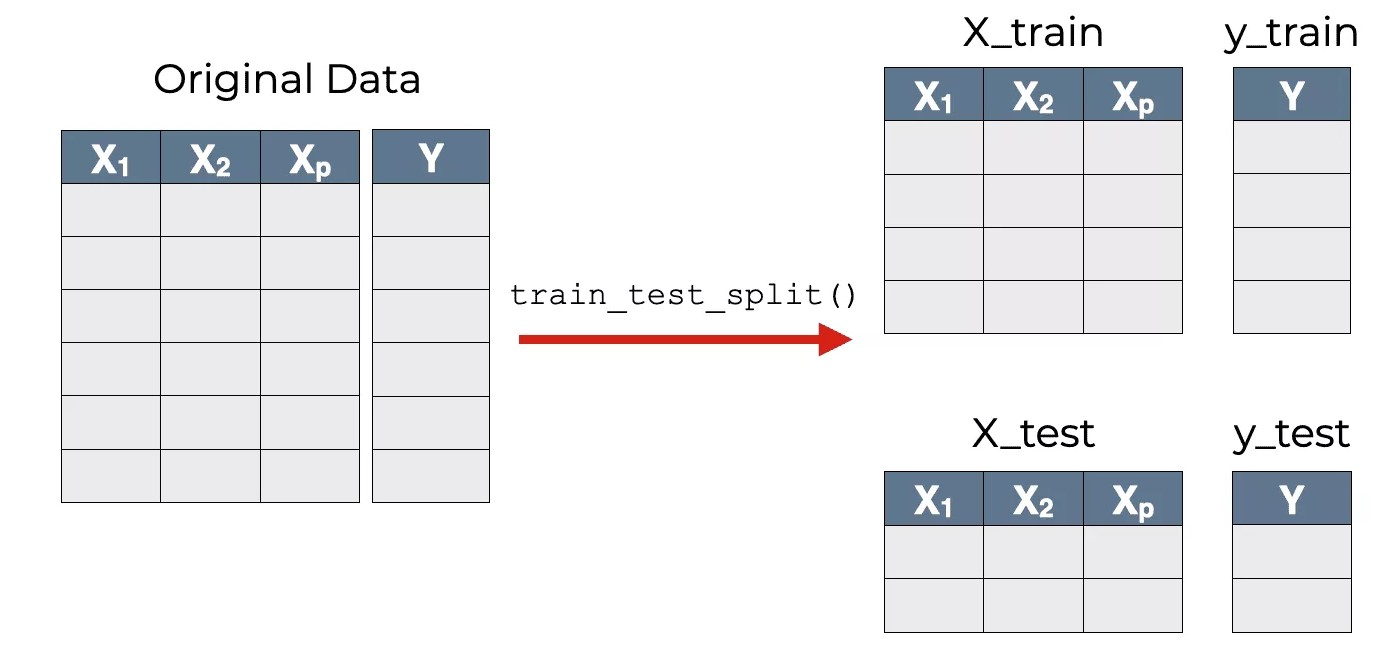



3. Pipeline
Es un proceso comprendido en varias fases secuenciales, siendo cada salida la entrada del anterior, sin perder datos y conocimiento.
-Transformador (agregación)
-Estimador (aprende y aplica el estado).
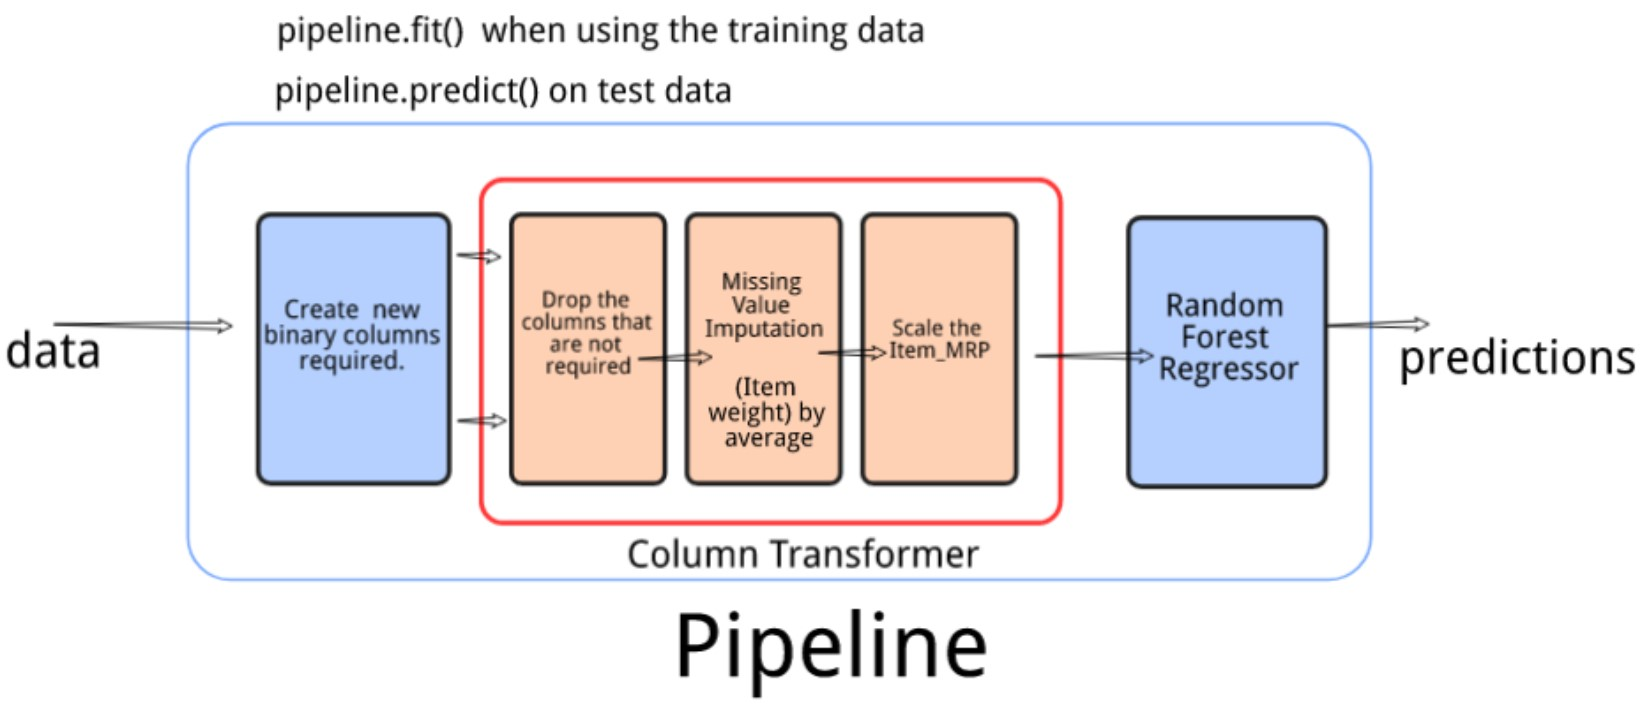

C:\Users\Ricardo Romero\AppData\Local\Temp\ipykernel_15532\365131844.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  datos.drop(['ix','Id','danho','ciclo','Cod.Asign','Cod.Curso','Convocatoria','Anho', 'Semestre', 'Anho.Firma', 'Segundo.Par', 'AOT', 'Primer.Rec', 'Segundo.Rec'],1).hist()


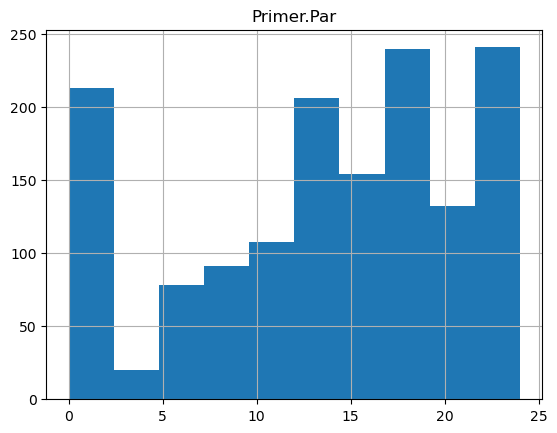

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Atributos:  [19]
Predicción de pase ideal:  1
Predicción de pase apróx.:  1
-
Atributos:  [0]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [19]
Predicción de pase ideal:  1
Predicción de pase apróx.:  1
-
Atributos:  [7]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [14]
Predicción de pase ideal:  1
Predicción de pase apróx.:  0
-
Atributos:  [2]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [10]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [0]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [0]
Predicción de pase ideal:  1
Predicción de pase apróx.:  0
-
Atributos:  [24]
Predicción de pase ideal:  0
Predicción de pase apróx.:  1
-
Atributos:  [15]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [19]
Predicción de pase ideal:  1
Predicción de pase apróx.:  1
-
Atributos:  [10]
Predicción de pase ideal:  0
Predicción de pase apró

C:\Users\Ricardo Romero\AppData\Local\Temp\ipykernel_15532\365131844.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  datos.drop(['ix','Id','danho','ciclo','Cod.Asign','Cod.Curso','Convocatoria','Anho', 'Semestre', 'Anho.Firma', 'Segundo.Par', 'AOT', 'Primer.Rec', 'Segundo.Rec'],1).hist()


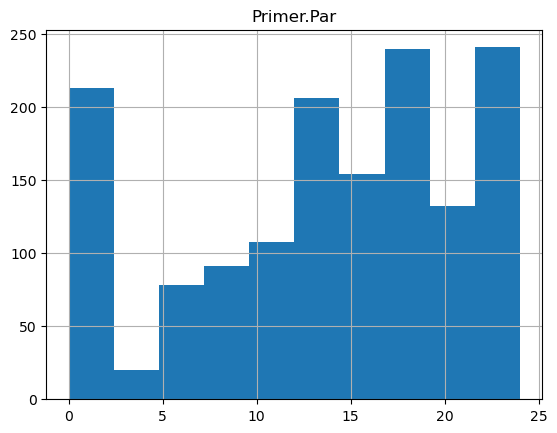

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Atributos:  [24 19]
Predicción de pase ideal:  1
Predicción de pase apróx.:  1
-
Atributos:  [13 13]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [24 15]
Predicción de pase ideal:  1
Predicción de pase apróx.:  1
-
Atributos:  [21 17]
Predicción de pase ideal:  1
Predicción de pase apróx.:  1
-
Atributos:  [12 11]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [12 30]
Predicción de pase ideal:  0
Predicción de pase apróx.:  1
-
Atributos:  [11  0]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [16  0]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [18 15]
Predicción de pase ideal:  0
Predicción de pase apróx.:  1
-
Atributos:  [17 14]
Predicción de pase ideal:  0
Predicción de pase apróx.:  1
-
Atributos:  [14 13]
Predicción de pase ideal:  1
Predicción de pase apróx.:  0
-
Atributos:  [16  0]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [19 17]
Predicci

C:\Users\Ricardo Romero\AppData\Local\Temp\ipykernel_15532\365131844.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  datos.drop(['ix','Id','danho','ciclo','Cod.Asign','Cod.Curso','Convocatoria','Anho', 'Semestre', 'Anho.Firma', 'Segundo.Par', 'AOT', 'Primer.Rec', 'Segundo.Rec'],1).hist()


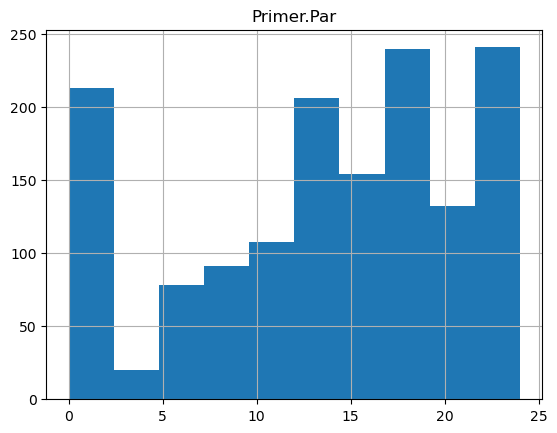

Atributos:  [15 18]
Predicción de pase ideal:  1
Predicción de pase apróx.:  1
-
Atributos:  [24 21]
Predicción de pase ideal:  1
Predicción de pase apróx.:  1
-
Atributos:  [24 13]
Predicción de pase ideal:  1
Predicción de pase apróx.:  1
-
Atributos:  [4 4]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [0 0]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [17 25]
Predicción de pase ideal:  1
Predicción de pase apróx.:  1
-
Atributos:  [0 0]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [0 0]
Predicción de pase ideal:  1
Predicción de pase apróx.:  0
-
Atributos:  [10 12]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [13 11]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [0 0]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [ 7 11]
Predicción de pase ideal:  0
Predicción de pase apróx.:  0
-
Atributos:  [24 13]
Predicción de pase

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
# Usando Regresión Logística


import pandas as pd
import numpy as np
from sklearn import linear_model, model_selection
from sklearn.preprocessing import *
from sklearn.metrics import confusion_matrix

# Se define la función encargada de predecir los resultados
def prediccion(columna_atributos):

  # Lee todos los datos del .csv (Comma Separated Values)
  datos = pd.read_csv("https://raw.githubusercontent.com/diegostaPy/cursoIA/main/datosRendimiento/datosfiltrados.csv", sep=",")
  datos = datos[datos['Asignatura'] == "DINAMICA"]

  # Gráfico correspondiente
  datos.drop(['ix','Id','danho','ciclo','Cod.Asign','Cod.Curso','Convocatoria','Anho', 'Semestre', 'Anho.Firma', 'Segundo.Par', 'AOT', 'Primer.Rec', 'Segundo.Rec'],1).hist()
  plt.show()

  # Columna auxiliar para pasar los datos strings de aprobados a 0 o 1
  aux_aprobados = pd.get_dummies(pd.DataFrame(datos["Aprobado"]))
  objetivos = np.array(aux_aprobados.drop(["Aprobado_N"], axis=1))
  
  # Los objetivos son los datos que queremos predecir.
  atributos = np.array(datos[columna_atributos])

  # Trains: Los datos que se usan para entrenar el modelo.
  # Tests:  Los datos que se usan para hacer las comparaciones entre el train y el test.
  atributos_train, atributos_test, objetivos_train, objetivos_test = model_selection.train_test_split(atributos, objetivos, test_size = 0.1)
  modelo = linear_model.LogisticRegression()
  modelo.fit(atributos_train, objetivos_train)
    # Se calcula la precisión con la cual fueron calculados los datos
  accuracy = modelo.score(atributos_test, objetivos_test)

  # A partir de ello, se predice a través de una fuente confiable de datos
  predictions = modelo.predict(atributos_test)

  # Impresión en pantalla
  for i in range(len(predictions)):
    print("Atributos: ", atributos_test[i])
    print("Predicción de pase ideal: ", int(objetivos_test[i]))
    print("Predicción de pase apróx.: ", predictions[i])
    print("-")
  print("Precisión: ", (accuracy * 100), "%")
  print("Matriz de Confusión: \n", confusion_matrix(objetivos_test, predictions))
  return [atributos_test, objetivos_test, predictions, accuracy]

# Usando datos del 1EP
columna_atributos = ["Primer.Par"]
datos1EP = prediccion(columna_atributos)
print("=====----------------------------------------------------------------------------=====")
# Usando datos del 1EP y 2EP
columna_atributos = ["Primer.Par", "Segundo.Par"]
prediccion(columna_atributos)
datos2EP = prediccion(columna_atributos)

accuracy_rel = abs(datos1EP[3] - datos2EP[3])/datos1EP[3]
print("Precisión relativa entre ambos casos: ", accuracy_rel*100, "%")